# Week 6 - question 2

In [4]:
from gurobipy import * # type: ignore
from gurobipy import quicksum, GRB # type: ignore

import matplotlib.pyplot as plt # type: ignore
from utils import *

import time

import networkx as nx 

A city is divided into `n` districts. The travel time (in minutes) from District `i` to District `j` is `d_ij`. <br>
The population of District `i` (in thousands) is `p_i`. <br>
For example, with `n = 8` districts, it takes 5 minutes to travel from District 2 to District 3, and District 1 has 40,000 citizens.<br><br>

The city has `m` ambulances to be located in `m` districts. <br>
The population-weighted firefighting time for each district is the product of its population and the travel time to the nearest ambulance. <br>
The goal is to minimize the maximum population-weighted firefighting time among all districts.<br><br>

For instance, with `m = 2` and `n = 8`, if ambulances are in Districts 1 and 8, <br>
the closest ambulance for Districts 1, 2, and 3 is in District 1, and for the remaining districts, it is in District 8.<br>


<table>
    <thead>
        <tr>
            <th scope="col"><p><span>District</span></p></th>
            <th scope="col"><p><span>1</span></p></th>
            <th scope="col"><p><span>2</span></p></th>
            <th scope="col"><p><span>3</span></p></th>
            <th scope="col"><p><span>4</span></p></th>
            <th scope="col"><p><span>5</span></p></th>
            <th scope="col"><p><span>6</span></p></th>
            <th scope="col"><p><span>7</span></p></th>
            <th scope="col"><p><span>8</span></p></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><p><span>1</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>9</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>10</span></p></td>
        </tr>
        <tr>
            <td><p><span>2</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>12</span></p></td>
            <td><p><span>9</span></p></td>
        </tr>
        <tr>
            <td><p><span>3</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>7</span></p></td>
        </tr>
        <tr>
            <td><p><span>4</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>4</span></p></td>
        </tr>
        <tr>
            <td><p><span>5</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>4</span></p></td>
        </tr>
        <tr>
            <td><p><span>6</span></p></td>
            <td><p><span>9</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>2</span></p></td>
        </tr>
        <tr>
            <td><p><span>7</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>12</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>5</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>0</span></p></td>
            <td><p><span>2</span></p></td>
        </tr>
        <tr>
            <td><p><span>8</span></p></td>
            <td><p><span>10</span></p></td>
            <td><p><span>9</span></p></td>
            <td><p><span>7</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>2</span></p></td>
            <td><p><span>0</span></p></td>
        </tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th scope="col"><p><span>District</span></p></th>
            <th scope="col"><p><span>Population</span></p></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><p><span>1</span></p></td>
            <td><p><span>40</span></p></td>
        </tr>
        <tr>
            <td><p><span>2</span></p></td>
            <td><p><span>30</span></p></td>
        </tr>
        <tr>
            <td><p><span>3</span></p></td>
            <td><p><span>35</span></p></td>
        </tr>
        <tr>
            <td><p><span>4</span></p></td>
            <td><p><span>20</span></p></td>
        </tr>
        <tr>
            <td><p><span>5</span></p></td>
            <td><p><span>15</span></p></td>
        </tr>
        <tr>
            <td><p><span>6</span></p></td>
            <td><p><span>50</span></p></td>
        </tr>
        <tr>
            <td><p><span>7</span></p></td>
            <td><p><span>45</span></p></td>
        </tr>
        <tr>
            <td><p><span>8</span></p></td>
            <td><p><span>60</span></p></td>
        </tr>
    </tbody>
</table>

The city has `m` ambulances and wants to locate them to `m` of the districts. <br>
For each district, the population-weighted firefighting time is defined as the <br>
product of the district population times the amount of time it takes for the closest ambulance to travel to it. <br>
The decision maker aims to locate the `m` ambulances to minimize the maximum population-weighted firefighting time among all districts.<br><br>

As an example, suppose that `m=2`, `n=8`, `d_ij` and `p_i` are provided in Table 2, <br>
and the two ambulances are located in District 1 and 8. We then know that for Districts 1, 2, and 3 <br>
the closest ambulance is in District 1 and for the remaining five districts the closest ambulance is in District 8. <br>
The firefighting time for the eight districts are thus 0, 3, 4, 4, 4, 2, 2, and 0 minutes, respectively. <br>
The population-weighted firefighting times may then be calculated as 0, 90, 140, 80, 60, 100, 90, and 0. <br>
The maximum among the eight districts is therefore 140.<br><br>

For this problem, formulate an integer program that can minimize the maximum population-weighted firefighting time among all districts. <br>
Then write a program to invoke a solver (e.g., write a Python program to invoke Gurobi Optimizer) to solve the above instance <br>
and find an optimal solution for each problem. <br>
Write down the minimized maximum population-weighted firefighting times among all districts of the two districts that ambulances should be located in <br>
(i.e., the objective value of an optimal solution). <br><br>

Do not have any symbol other than numeric values in your answer.

## Optimization Problem

#### **Objective Function**
$$
\min \sum_{i=1}^{n} w_i
$$

#### **Subject to:**
1. **Facility Selection Constraint**  
   $$
   \sum_{j=1}^{n} x_j = m
   $$

   - Ensures that exactly m facilities are selected. 
   - x_j is a binary variable x_j = 1 if facility j is selected, otherwise 0. <br><br>

2. **Assignment Constraints**  
   $$
   y_{ij} \leq x_j, \quad \forall i = 1, \dots, n, \quad j = 1, \dots, n
   $$

   - An entity can only be assigned to a facility if the facility is selected.
   - Prevents assigning entities to closed facilities.

   $$
   \sum_{j=1}^{n} y_{ij} = 1, \quad \forall i = 1, \dots, n
   $$

   - Ensures each entity is assigned to exactly one facility.
   - Each row in the assignment matrix sums to 1. <br><br>

3. **Distance Constraints**  
   $$
   w_i \geq \sum_{j=1}^{n} d_{ij} y_{ij}, \quad \forall i = 1, \dots, n
   $$

   - Ensures that w_i represents the **actual distance** based on assignment.
   - d_ij is the **distance** from **entity \( i \) to facility \( j \)**.
   - y_ij ensures **only the selected facility’s distance is used**. <br><br>

4. **Binary Constraints**  
   $$
   x_j, y_{ij} \in \{0,1\}, \quad \forall i = 1, \dots, n, \quad j = 1, \dots, n
   $$

5. **Non-Negativity Constraint**  
   $$
   w_i \geq 0, \quad \forall i = 1, \dots, n
   $$


## MILP Formulation

In [5]:
# create model instance
model = Model()

Restricted license - for non-production use only - expires 2026-11-23


In [6]:
# === PARAMETERS ===

# Distance matrix - (d_nn)
d_nn = [
    [0, 3, 4, 6, 8, 9, 8, 10],
    [3, 0, 5, 4, 8, 6, 12, 9],
    [4, 5, 0, 2, 2, 3, 5, 7],
    [6, 4, 2, 0, 3, 2, 5, 4],
    [8, 8, 2, 3, 0, 2, 2, 4],
    [9, 6, 3, 2, 2, 0, 3, 2],
    [8, 12, 5, 5, 2, 3, 0, 2],
    [10, 9, 7, 4, 4, 2, 2, 0]
]

# Demand/Population at each district - (p_n)
p_n = [40, 30, 35, 20, 15, 50, 45, 60]

In [7]:
def get_distance(i, j):
    return d_nn[i-1][j-1]

get_distance(1, 2)

3

In [8]:
# === SETS ===
# set of ambulances - (m)
m = list(range(1, 2+1))

# set of districts - (n)
n = list(range(1, 8+1))

In [9]:
m , n, len(m)

([1, 2], [1, 2, 3, 4, 5, 6, 7, 8], 2)

In [10]:
# ==== VARIABLES ====

# x_j = 1 if district j is assigned an ambulance, 0 otherwise
x = model.addVars(n, vtype=GRB.BINARY, name="ambulance asingment to district j") 

# y_ij = 1 if district j is assigned to ambulance i, 0 otherwise
y = model.addVars(n, n, vtype=GRB.BINARY, name="if district i is assigned to ambulance in district j")

# distance from district j to ambulance i
w_max = model.addVar(vtype=GRB.CONTINUOUS, name="distance from district j to ambulance i")

In [11]:
# === CONSTRAINTS ===

# 1. total number of ambulances m = x_j
model.addConstr(quicksum(x[j] for j in n) == len(m), "total ambulances")

# 2. only assign district j to ambulance i if ambulance i is assigned
model.addConstrs((y[i, j] <= x[j] for i in n for j in n), "assign district j to ambulance i if ambulance i is assigned")

# 3. each district is assigned to exactly one ambulance
model.addConstrs((quicksum(y[i, j] for j in n) == 1 for i in n), "each district is assigned to exactly one ambulance")

# 4. Distance from district j to ambulance i multiplied by population of district i
model.addConstrs((w_max >= quicksum(y[i, j] * get_distance(i, j)*p_n[i-1] for j in n) for i in n), "Distance from district i to ambulance j multiplied by population of district j")

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>}

In [12]:
# List all constraints
constraints = model.getConstrs()

In [13]:
# Print constraints
for c in constraints:
    print(f"Constraint Name: {c.ConstrName}\n ========================== \n")
    expr = model.getRow(c)  # Get the constraint expression
    sense = c.Sense  # Get inequality sign
    rhs = c.RHS  # Get the right-hand side value

    # Map Gurobi senses to mathematical notation
    sense_map = {GRB.LESS_EQUAL: "≤", GRB.EQUAL: "=", GRB.GREATER_EQUAL: "≥"}

    # Format and print constraint equation
    print(f"{expr} {sense_map[sense]} {rhs}\n")

In [14]:
# ==== Objective function =====
model.setObjective(w_max, GRB.MINIMIZE)

In [15]:
# Optimize the model
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 81 rows, 73 columns and 264 nonzeros
Model fingerprint: 0x8a257b08
Variable types: 1 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 600.0000000
Presolve time: 0.01s
Presolved: 81 rows, 73 columns, 264 nonzeros
Variable types: 0 continuous, 73 integer (72 binary)

Root relaxation: objective 8.224096e+01, 49 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   82.24096    0   37  600.00000  

In [16]:
# Print the optimal variables x and objective value
for j, v in x.items():
    print(f"x_{j}: {v.x}")

print(f"Optimal Objective Value: {model.objVal}")

x_1: 1.0
x_2: -0.0
x_3: -0.0
x_4: -0.0
x_5: -0.0
x_6: 1.0
x_7: -0.0
x_8: -0.0
Optimal Objective Value: 135.0


In [17]:
# Print the variables y multiplied by distance and population if assigned
for i, j in y:
    if y[i, j].x > 0:
        print(f"y_{i, j}: {y[i, j].x} * {get_distance(i, j)} * {p_n[i-1]} = {y[i, j].x * get_distance(i, j) * p_n[i-1]}")

y_(1, 1): 1.0 * 0 * 40 = 0.0
y_(2, 1): 1.0 * 3 * 30 = 90.0
y_(3, 6): 1.0 * 3 * 35 = 105.0
y_(4, 1): 1.0 * 6 * 20 = 120.0
y_(5, 6): 1.0 * 2 * 15 = 30.0
y_(6, 6): 1.0 * 0 * 50 = 0.0
y_(7, 6): 1.0 * 3 * 45 = 135.0
y_(8, 6): 1.0 * 2 * 60 = 120.0


## Heuristic solution 

Continue from the previous question. For any value of m, consider the following heuristic algorithm which runs m iterations. <br>
In each iteration, we locate an ambulance in a district that <br><br>

1) currently does not have an ambulance, and 
2) may minimize the maximum population-weighted firefighting times among all districts. <br>
If there are multiple districts satisfying these two conditions, <br>
pick the one with the smallest district ID among them. <br>
We then proceed to the next iteration to look for the next district to locate an ambulance. <br><br>

Consider a tiny example with n = 4, m = 2, and dij and pj are provided in Table 3. <br>
To locate the first ambulance, we examine the maximum population-weighted firefighting <br>
times of locating an ambulance in Districts 1, 2, 3, and 4 as 140, 175, 160, and 240, respectively. <br>
We will choose District 1. <br><br>

To locate the second ambulance, we take the ambulance in District 1 <br>
as given and examine the maximum population-weighted firefighting times <br>
of locating an ambulance in Districts 2, 3, and 4 as 140, 90, and 90, respectively. <br>
We will choose District 3. The final objective value of locating two ambulances <br>
in Districts 1 and 3 is 90 (which is 30 ×3 for District 2).<br><br>


In [18]:
start_time = time.time()
# Heuristic

# Assignment of districts to ambulances
x_j = {j: 0 for j in n}

# Get the assignment of districts to the nearest ambulances
y_j = {j: 0 for j in n}

# current minimum distance
dmin_j = {j: 9999 for j in n}

# create a list to store all y[i, j] values to get the distance values if ambulance is assigned to district j
y_values = { j : [] for j in n }
y_max_values = { j : 0 for j in n }

# Loop through for all ambulances
for _ in range(len(m)):
    # Check if the district has no ambulance assigned & may minimize the maximum population-weighted firefighting times among all districts
    for j in n:
        # --- CONDITION 1 --- if district j is not assigned to any ambulance
        if x_j[j] == 0:  
            for i in n:
                y_values[j].append(min(dmin_j[i], get_distance(i, j)*p_n[i-1]))  
            y_max_values[j] = max(y_values[j])
        else:
            y_max_values[j] = 99999
            continue

    # --- CONDITION 2 --- Check which district to assign to minimum y_max_values

    # Check min in y_max_values
    min_y_max = min(y_max_values.values())

    # Get the district with the minimum y_max_values
    district = [key for key in y_max_values if y_max_values[key] == min_y_max][0]

    # Assign the district to the nearest ambulance
    x_j[district] = 1

    # check the current assigned ambulance assigned to is less than the minimum distance dmin_j
    for i in n:
        if get_distance(i, district)*p_n[district-1] < dmin_j[i]:
            dmin_j[i] = get_distance(i, district)*p_n[i-1]
            y_j[i] = district
    
    # Reset y_values and y_max_values for the next iteration
    y_values = {j: [] for j in n}
    y_max_values = {j: 0 for j in n}

end_time = time.time()
Execution_time = end_time - start_time
print(f"Execution time: {Execution_time:.10f} seconds")

Execution time: 0.0000000000 seconds


In [19]:
x_j

{1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}

In [20]:
y_j

{1: 1, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4}

In [21]:
dmin_j

{1: 0, 2: 120, 3: 70, 4: 0, 5: 45, 6: 100, 7: 225, 8: 240}

In [22]:
y_max_values_max = max(dmin_j.values())
y_max_values_max

240

In [23]:
# Print the optimal results objective value vs heuristic results
print(f"Optimal Objective Value: {model.objVal:.1f}")
print(f"Heuristic Objective Value: {y_max_values_max:.1f}")

# Display gap between heuristic and optimal results
optimal_gap = y_max_values_max - model.objVal
print(f"Optimal Gap: {optimal_gap:.1f}")

# Print their run times
print(f"Optimal Execution Time: {model.Runtime:.10f} seconds")
print(f"Heuristic Execution Time: {Execution_time:.10f} seconds")

Optimal Objective Value: 135.0
Heuristic Objective Value: 240.0
Optimal Gap: 105.0
Optimal Execution Time: 0.0429999828 seconds
Heuristic Execution Time: 0.0000000000 seconds


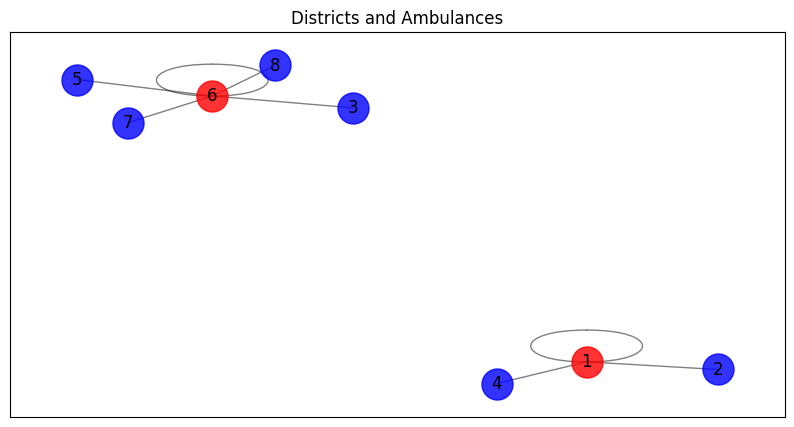

In [38]:
#Visualize the network using graph plot
G = nx.Graph()
G.add_nodes_from(n)
G.add_nodes_from(m)
G.add_edges_from([(i, j) for i in n for j in n if y[i, j].x > 0])

# Draw the graph
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G)

# mark the distircts with ambulances
districts_with_ambulances = [j for j in n if x[j].x > 0]
nx.draw_networkx_nodes(G, pos, nodelist=districts_with_ambulances, node_color="r", node_size=500, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[j for j in n if j not in districts_with_ambulances], node_color="b", node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Districts and Ambulances")
plt.show()
